# Configuración

In [1]:
# imports comunes
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model

# Hacer las salidas de este notebook estables a través de ejecuciones
np.random.seed(42)

# Hacemos algunos ajustes a los gráficos
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Donde grabar las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentos"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    # print("Grabando figura", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignorar warning inútiles (ver SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Código de ejemplo 1-1

Esta función simplemente fusiona los datos de satisfacción de vida de la OCDE y los datos del PIB per cápita del FMI.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
datapath = os.path.join("data", "lifesat", "")

In [4]:
# Carga los datos
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

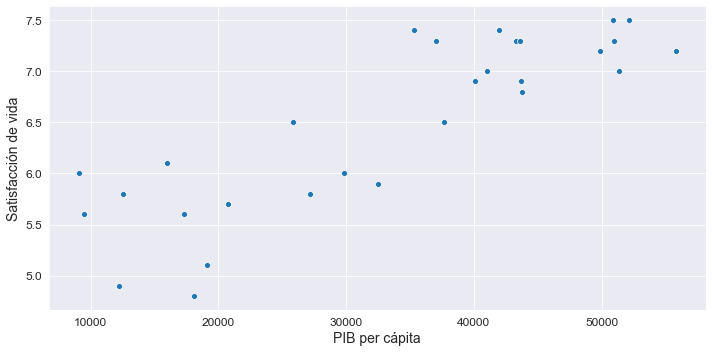

In [5]:
# Visualiza los datos
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x="GDP per capita", y="Life satisfaction", data=country_stats)
plt.xlabel("PIB per cápita")
plt.ylabel("Satisfacción de vida")

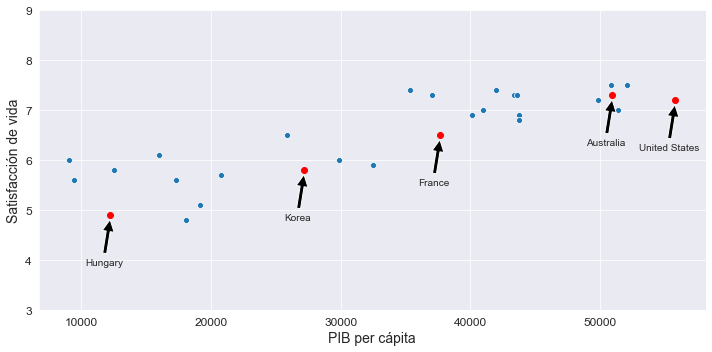

In [26]:
# Visualiza los datos con anotaciones interesantes
countries = ["Hungary", "Korea", "France", "Australia", "United States"]

sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x="GDP per capita", y="Life satisfaction", data=country_stats)

for country in countries:
    _x, _y = country_stats.loc[country]
    #ax.text(_x, _y-0.2, country, ha="center")
    ax.annotate(country, xy=(_x, _y - 0.05), xytext=(_x - 500, _y - 1), ha="center",
            arrowprops=dict(facecolor='black', shrink=0.05,)
    )
    ax.plot(_x, _y, "ro")

# Set the limit
plt.ylim(3,9)
plt.xlabel("PIB per cápita")
plt.ylabel("Satisfacción de vida")

Como veíamos en el capítulo 1, parece que la satifacción de vida aumenta más o menos linealmente a medida que aumenta el PIB per cápita del país. Por tanto,vamos a modelar la satisfacción de vida como una función lineal del PIB per cápita. Este paso se llama selección del modelo: seleccionas un modelo lineal de satisfacción de vida con solo un atributo, PIB per cápita.

Aquí es donde entra en juego el algoritmo de Regresión Lineal: le proporcionamos los datos de entrenamiento y encuentra los parámetros que hacen que el modelo lineal se ajuste mejor a nuestros datos.

In [7]:
# Selecciona un modelo lineal
model = sklearn.linear_model.LinearRegression()

# Entrena el modelo
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Esto se llama entrenar el modelo. En nuestro caso el algoritmo encuentra que el valor de los parámetros óptimos son: 

In [8]:
theta_0 = model.intercept_[0]
theta_1 = model.coef_[0][0]

print(f"Los parámetros óptimos son: theta_0 = {theta_0} y theta_1 = {theta_1}")

Los parámetros óptimos son: theta_0 = 4.853052800266436 y theta_1 = 4.911544589158484e-05


Ahora el modelo se ajusta a los datos de entrenamiento tanto como es posible (para un modelo lineal), como se puede ver en las siguiente figura:

Text(2000, 6.3, '$\\theta_1 = $4.911544589158484e-05')

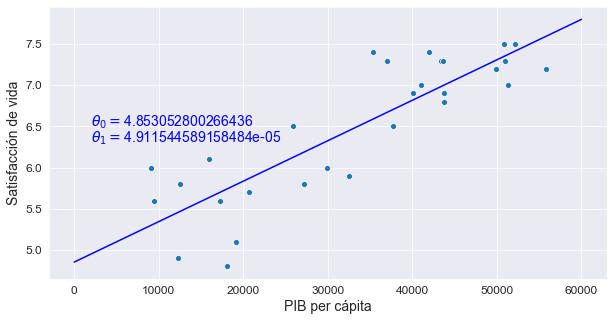

In [24]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x="GDP per capita", y="Life satisfaction", data=country_stats)
plt.xlabel("PIB per cápita")
plt.ylabel("Satisfacción de vida")

# Dibujamos la línea de regresión que calcula nuestro modelo
plt.plot(X, theta_0 + theta_1 * X, "b" )
plt.text(2000, 6.5, r"$\theta_0 = $" + f"{theta_0}", fontsize=14, color="b")
plt.text(2000, 6.3, r"$\theta_1 = $" + f"{theta_1}", fontsize=14, color="b")


Ajustando estos parámetros, podemos hacer que nuestro modelo represente cualquier función lineal, como se muestra a continuación:

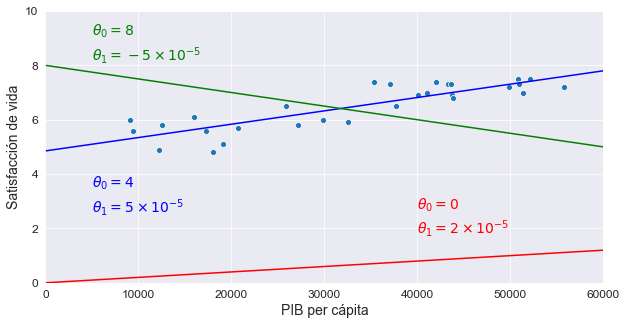

In [10]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x="GDP per capita", y="Life satisfaction", data=country_stats)
plt.axis([0, 60000, 0, 10])
plt.xlabel("PIB per cápita")
plt.ylabel("Satisfacción de vida")

X = np.linspace(0, 60000, 1000)

# Dibujamos la línea de regresión que calcula nuestro modelo
plt.plot(X, theta_0 + theta_1 * X, "b" )
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
# Añadimos otra línea de regresión simulando otros parámetros diferentes
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r");


In [23]:
# Hace una predicción para Chipre
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = model.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


5.96244744318815

Text(25000, 4.0, 'Predicción = 5.96244744318815')

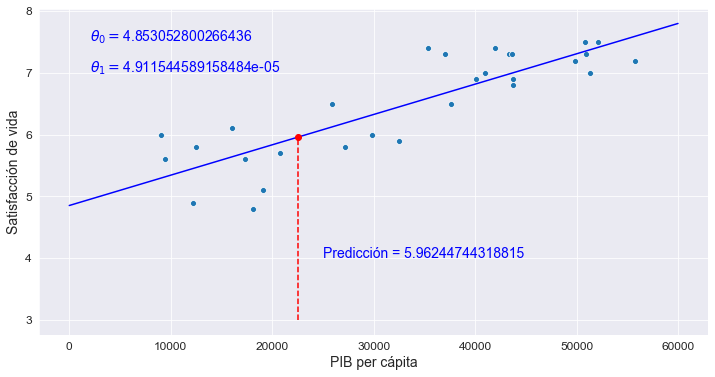

In [46]:
sns.set_style("darkgrid")
figure, axs = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(x="GDP per capita", y="Life satisfaction", data=country_stats)
plt.xlabel("PIB per cápita")
plt.ylabel("Satisfacción de vida")

# Dibujamos la línea de regresión que calcula nuestro modelo
plt.plot(X, theta_0 + theta_1 * X, "b" )
plt.text(2000, 7.5, r"$\theta_0 = $" + f"{theta_0}", fontsize=14, color="b")
plt.text(2000, 7.0, r"$\theta_1 = $" + f"{theta_1}", fontsize=14, color="b");

# Dibujamos la línea discontinua de nuestra predicción
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [3, cyprus_predicted_life_satisfaction], "r--")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.text(25000, 4.0, f"Predicción = {cyprus_predicted_life_satisfaction}", fontsize=14, color="b")